# Template 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [42]:
import pandas as pd
from random import random
from tqdm import tqdm
import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)

import seaborn as sns
sns.set_theme()

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

from IPython.display import Markdown, display
def md(arg):
    display(Markdown(arg))

#from pandas_profiling import ProfileReport
# report = ProfileReport(#DataFrame here#, minimal=True)
# report.to

#import pyarrow.parquet as pq
# df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

#import json
#def open_file_json(path,mode='r',var=None):
#    if mode == 'w':
#        with open(path,'w') as f:
#            json.dump(var, f)
#    if mode == 'r':
#        with open(path,'r') as f:
#            return json.load(f)

In [8]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.21.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.8.0-7642-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: 346931c9097044232349d6c6a04b7f43e5435312

Git repo: http://github.com/ysraell/examples

Git branch: master

matplotlib: 3.3.4
pandas    : 1.2.2
seaborn   : 0.11.1
numpy     : 1.19.5
sys       : 3.8.8 (default, Feb 19 2021, 17:55:44) 
[GCC 8.3.0]
ipywidgets: 7.6.3
json      : 2.0.9

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:           15G
Swap:         4.0G


In [29]:
def event(prob: float) -> bool:
    return random() <= prob

In [34]:
prob = 0.1
events = [1*event(prob) for _ in range(100000)]

In [35]:
pd.DataFrame(events, columns=['event']).describe()

,event
count,100000.000000
mean,0.100050
std,0.300068
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [73]:
step = 0.01
prob_i = 0.01
prob_f = 0.99 + step
N_rounds = int(1e5 + 1)
N_events = int(1e7 + 1)
results = {}
for prob in np.arange(prob_i, prob_f, step):
    results[prob.round(2)] = []
    for _ in range(1,N_rounds):
        for i in range(1,N_events):
            if event(prob):
                results[prob.round(2)].append(i)
                break
        else:
            results[prob.round(2)].append(i)

In [74]:
df_results = pd.DataFrame.from_dict(results)

In [107]:
df_results_desc = df_results.describe()
df_results_desc

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,99.88155,50.124670,33.317330,24.929380,20.030210,16.658780,14.223150,12.481820,11.108120,9.960880,9.091620,8.350960,7.695520,7.13249,6.672770,6.236900,5.884600,5.561450,5.283310,5.010390,4.757450,4.554860,4.337270,4.170460,3.982540,3.856440,3.714060,3.592550,3.447070,3.331750,3.218750,3.134090,3.035100,2.943550,2.86679,2.787450,2.693670,2.625580,2.570640,2.497580,2.44553,2.381160,2.317700,2.271980,2.217770,2.17199,2.131300,2.081850,2.030910,2.003060,1.953250,1.925240,1.886880,1.857310,1.822010,1.788500,1.755350,1.729650,1.69373,1.670490,1.641470,1.609580,1.589190,1.563460,1.537760,1.512210,1.49012,1.468390,1.451290,1.430300,1.40720,1.38945,1.371510,1.349920,1.333620,1.315660,1.298060,1.282470,1.266850,1.246600,1.23602,1.221250,1.205150,1.189280,1.176320,1.163680,1.149940,1.13517,1.124760,1.111170,1.099430,1.086490,1.075370,1.06289,1.051560,1.041050,1.031310,1.020330,1.010030
std,99.47852,49.843909,32.708353,24.347989,19.437389,16.175964,13.713291,11.977699,10.593711,9.429666,8.573893,7.829296,7.176611,6.62526,6.172969,5.715656,5.345908,5.052967,4.755568,4.480708,4.212225,4.022603,3.800774,3.629156,3.438092,3.335683,3.176337,3.047069,2.888204,2.783492,2.660881,2.595823,2.486731,2.385569,2.32631,2.209177,2.132369,2.067102,1.995192,1.944045,1.88241,1.817694,1.753031,1.703067,1.637868,1.58704,1.556305,1.505428,1.448584,1.416979,1.362719,1.336611,1.293329,1.271057,1.228236,1.189723,1.151716,1.121665,1.08379,1.061416,1.029231,0.988343,0.963989,0.937209,0.905948,0.876047,0.85368,0.827954,0.810835,0.783089,0.75584,0.73519,0.714532,0.687605,0.667175,0.641017,0.620261,0.601086,0.582155,0.556895,0.54022,0.521173,0.497721,0.473493,0.453512,0.437528,0.412262,0.39018,0.376612,0.349675,0.332031,0.307067,0.284412,0.25709,0.232556,0.206943,0.179416,0.144558,0.100447
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000

In [79]:
Max_events = df_results.max().max()

In [86]:
count_pos = {}
for prob,events in results.items():
    count_pos[prob] = {}
    for i in range(1,Max_events+1):
        count_pos[prob][i] = events.count(i)

In [93]:
df_count_pos = pd.DataFrame.from_dict(count_pos)

In [95]:
df_count_pos.head()

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
1,1023,1932,2893,3999,5008,6164,6930,8011,9015,10001,10897,11971,13123,14083,15112,16015,16818,17915,18692,19736,21168,21899,23021,23766,25086,26137,27140,27687,28800,30035,30897,32244,33034,34070,35115,35680,37251,38047,38816,40191,40808,41975,43236,44119,45104,45845,47034,48126,49407,49772,51068,52083,53039,53931,54960,55998,56999,57783,58980,59989,60975,62088,62917,63973,65073,66041,67157,68002,68999,69908,71065,72005,72918,74116,74961,75883,76975,77960,78981,80326,80938,81926,83011,84049,84985,85942,86868,88035,88965,89951,91005,92053,92979,94057,95094,96061,96961,98016,99005
2,997,1963,2915,3815,4709,5677,6550,7350,8157,8909,9735,10428,11290,12111,12631,13250,14090,14852,15570,16260,16369,17326,17771,18332,18775,19286,19574,20220,20570,21065,21420,21615,22119,22268,22658,22882,23322,23698,23543,23953,24278,24568,24524,24445,24684,24965,24884,24967,24793,25293,25046,24757,24795,24899,24748,24599,24426,24347,24263,23900,23769,23564,23267,22982,22620,22502,21939,21875,21287,21023,20472,20085,19745,19111,18800,18446,17777,17176,16510,15709,15366,14771,14049,13458,12758,12089,11506,10606,9763,9079,8128,7305,6543,5609,4665,3780,2948,1935,987
3,967,1903,2778,3709,4399,5147,6082,6779,7439,8164,8770,9302,9851,10274,10872,11352,11849,12049,12539,12710,13236,13394,13641,13865,14109,14024,14240,14545,14729,14601,14898,14475,14528,14758,14523,14835,14455,14577,14720,14302,14359,14017,13923,13945,13544,13500,13078,12861,12617,12420,12334,11988,11749,11348,11103,10825,10587,10451,9962,9583,9298,8897,8668,8343,7956,7584,7337,6902,6682,6342,6116,5713,5379,5047,4700,4298,4071,3807,3610,3124,3004,2687,2455,2076,1937,1684,1416,1188,1123,879,792,584,446,322,232,152,90,49,8
4,975,1906,2736,3606,4239,4904,5543,6311,6839,7263,7902,8154,8445,8921,9120,9686,9667,9951,10033,10243,10232,10145,10552,10686,10569,10442,10374,10462,10329,10215,10224,10032,10099,9759,9646,9685,9251,8948,9055,8642,8373,8095,7782,7641,7535,7234,6988,6736,6532,6175,5955,5833,5613,5257,5022,4707,4585,4276,3954,3897,3630,3434,3321,3061,2873,2546,2406,2232,2063,1899,1665,1584,1380,1279,1137,1057,897,841,707,688,574,511,401,358,285,243,185,149,131,84,69,56,26,12,9,7,1,0,0
5,938,1767,2679,3344,4002,4806,5200,5807,6172,6690,7005,7161,7366,7766,7894,7969,8075,8180,8235,8189,8119,8343,8128,8106,7842,7776,7701,7556,7635,7159,7077,6947,6653,6554,6329,6155,5764,5627,5398,5092,4975,4752,4556,4330,4212,3938,3775,3463,3188,3189,2892,2814,2502,2431,2254,2147,1968,1799,1693,1566,1368,1246,1151,1046,987,911,800,656,668,604,478,440,438,324,297,246,224,165,140,128,90,85,70,52,30,33,24,22,16,7,6,2,6,0,0,0,0,0,0


<AxesSubplot:>

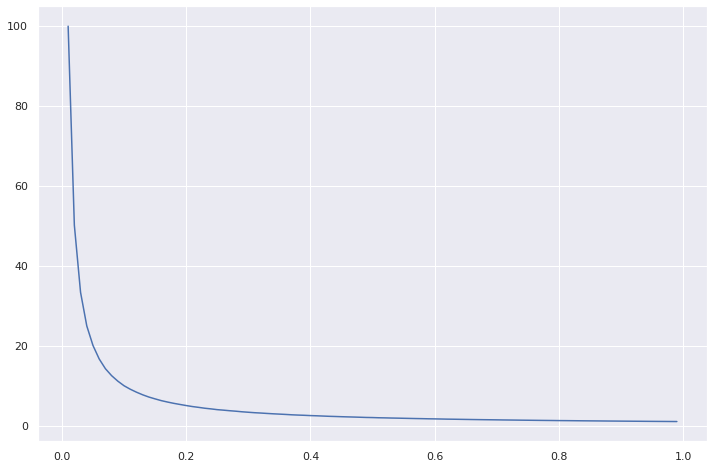

In [110]:
df_results_desc.loc['mean'].plot()

<AxesSubplot:>

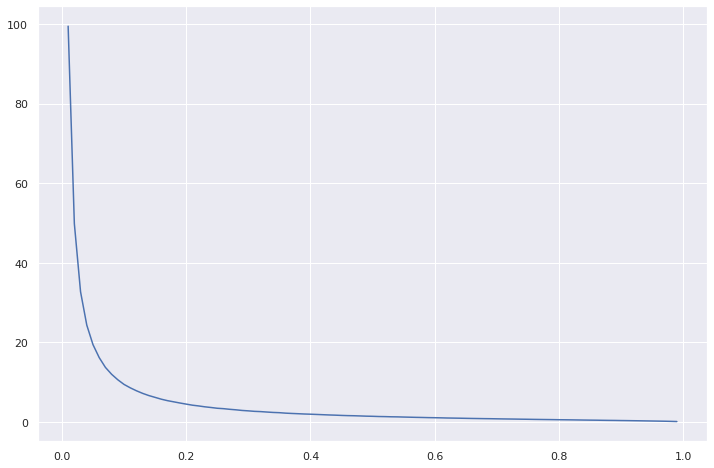

In [111]:
df_results_desc.loc['std'].plot()